In [27]:
from pyAudioAnalysis.audioSegmentation import speaker_diarization 
from pydub import AudioSegment

In [28]:
import os
import pandas as pd
import librosa
import librosa.display
from librosa import display
import numpy as np
import matplotlib.pyplot as plt
import glob 
from IPython.display import Audio

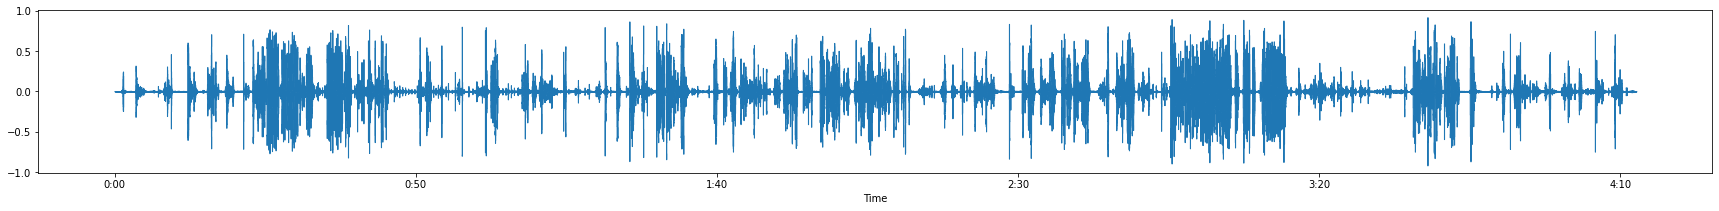

In [30]:
audio_file, sampling_rate = librosa.load("C:/Users/User/Desktop/diploma/movie.wav")
plt.figure(figsize=(30, 3))
librosa.display.waveshow(audio_file, sr=sampling_rate)

In [31]:
n_fft = 2048
S = librosa.stft(audio_file, n_fft=n_fft, hop_length=n_fft//2)
print(S.shape)
D = librosa.amplitude_to_db(np.abs(S), ref = np.max)
print(D)

(1025, 5443)
[[-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 ...
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]
 [-80. -80. -80. ... -80. -80. -80.]]


-80.0

In [32]:
nonMuteSections = librosa.effects.split(y=audio_file, top_db=np.max(abs(D)/2))
nonMuteSections

array([[  24064,   33280],
       [  34304,   40448],
       [  75264,  112640],
       [ 157696,  168448],
       [ 175104,  210944],
       [ 265728,  299008],
       [ 300032,  302592],
       [ 323072,  327680],
       [ 337408,  381440],
       [ 402944,  437248],
       [ 470016,  494592],
       [ 502784,  763392],
       [ 766464,  842240],
       [ 843264,  868352],
       [ 869376,  872960],
       [ 877056,  907264],
       [ 907776, 1006592],
       [1009152, 1014784],
       [1021440, 1027584],
       [1030656, 1036288],
       [1041408, 1046016],
       [1047552, 1049600],
       [1052160, 1056768],
       [1062912, 1067520],
       [1073664, 1078272],
       [1085440, 1090048],
       [1096704, 1100800],
       [1105920, 1160192],
       [1160704, 1163264],
       [1163776, 1172992],
       [1173504, 1182208],
       [1182720, 1206272],
       [1210880, 1216512],
       [1219584, 1224704],
       [1234432, 1238016],
       [1244672, 1252352],
       [1253376, 1275392],
 

In [33]:
def displayTime(j, startFrame, endFrame):    
    print(' start time: ' + str(startFrame/sampling_rate) + ', end time: ' + str(endFrame/sampling_rate))

In [36]:
audioFileName = "test"
j = 0
# newAudio = AudioSegment.from_wav("C://Users//User//Desktop//diploma//testcall.wav")
for i in nonMuteSections:
    if ((i[1]/sampling_rate)-(i[0]/sampling_rate)) <= 1:
        continue
#     displayTime(j, i[0], i[1])
    newAudio = AudioSegment.from_wav("C:/Users/User/Desktop/diploma/movie.wav")
    newAudio = newAudio[(i[0]/sampling_rate)*1000:(i[1]/sampling_rate)*1000]
    newAudio.export(str(j)+'_'+audioFileName+'.wav', format="wav") #Exports to a wav file in the current path.
    j += 1 
   
    


In [26]:
audioFileName = "test"
j = 0
# newAudio = AudioSegment.from_wav("C://Users//User//Desktop//diploma//testcall.wav")
for i in nonMuteSections:
    if ((i[1]/sampling_rate)-(i[0]/sampling_rate)) <= 1:
        continue
#     displayTime(j, i[0], i[1])
    newAudio = AudioSegment.from_wav("C:/Users/User/Downloads/test_eng.wav")
    newAudio = newAudio[(i[0]/sampling_rate)*1000:(i[1]/sampling_rate)*1000]
    newAudio.export("test_eng/"+str(j)+'_'+audioFileName+'.wav', format="wav") #Exports to a wav file in the current path.
    j += 1 
   

In [16]:
for i in range(j):
    newAudio = AudioSegment.from_wav(audio_file)
    newAudio = newAudio[spkdf['StartTime'][i]*1000:spkdf['EndTime'][i]*1000]
    newAudio.export(str(i)+'_'+audioFileName, format="wav") #Exports to a wav file in the current path.

AttributeError: 'numpy.ndarray' object has no attribute 'seek'

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SVC from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


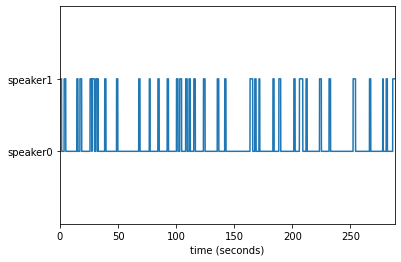

(array([1, 1, 1, ..., 1, 1, 1], dtype=int64), -1, -1)

In [4]:
num_speakers = 2
speaker_diarization("C://Users//User//Desktop//diploma//testcall.wav", num_speakers, plot_res=True)